# Cytosol Only Cellpose Segmentation

In [ ]:
import os
import numpy as np
import pandas as pd

from scportrait.pipeline.featurization import CellFeaturizer
from scportrait.pipeline.extraction import HDF5CellExtraction
from scportrait.pipeline.project import Project
from scportrait.pipeline.segmentation.workflows import CytosolOnlySegmentationCellpose
from scportrait.pipeline.selection import LMDSelection

In [2]:
project_location = "project_cytosol_only"

project = Project(
    os.path.abspath(project_location),
    config_path="config_example1.yml",
    overwrite=True,
    debug=True,
    segmentation_f=CytosolOnlySegmentationCellpose,
    extraction_f=HDF5CellExtraction,
    featurization_f=CellFeaturizer,
    selection_f=LMDSelection,
)

Updating project config file.
[18/03/2025 18:48:54] Loading config from /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/config.yml
[18/03/2025 18:48:54] Compression algorithm for extracted single-cell images: lzf


In [3]:
from scportrait.data._datasets import dataset_1

dataset_1_path = dataset_1()

# these example images are downloaded from the human protein atlas (www.proteinatlas.org)
images = [f"{dataset_1_path}/Ch1.tif", f"{dataset_1_path}/Ch2.tif", f"{dataset_1_path }/Ch3.tif"]

project.load_input_from_tif_files(images)

[18/03/2025 18:48:54] Output location /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/scportrait.sdata already exists. Overwriting.
INFO     The Zarr backing store has been changed from None the new file path:                                      
         /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_on
         ly/scportrait.sdata                                                                                       
[18/03/2025 18:48:54] Initialized temporary directory at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_c4851por for Project


[18/03/2025 18:48:54] Image input_image written to sdata object.
[18/03/2025 18:48:55] Cleaned up temporary directory at <TemporaryDirectory '/Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/Project_c4851por'>


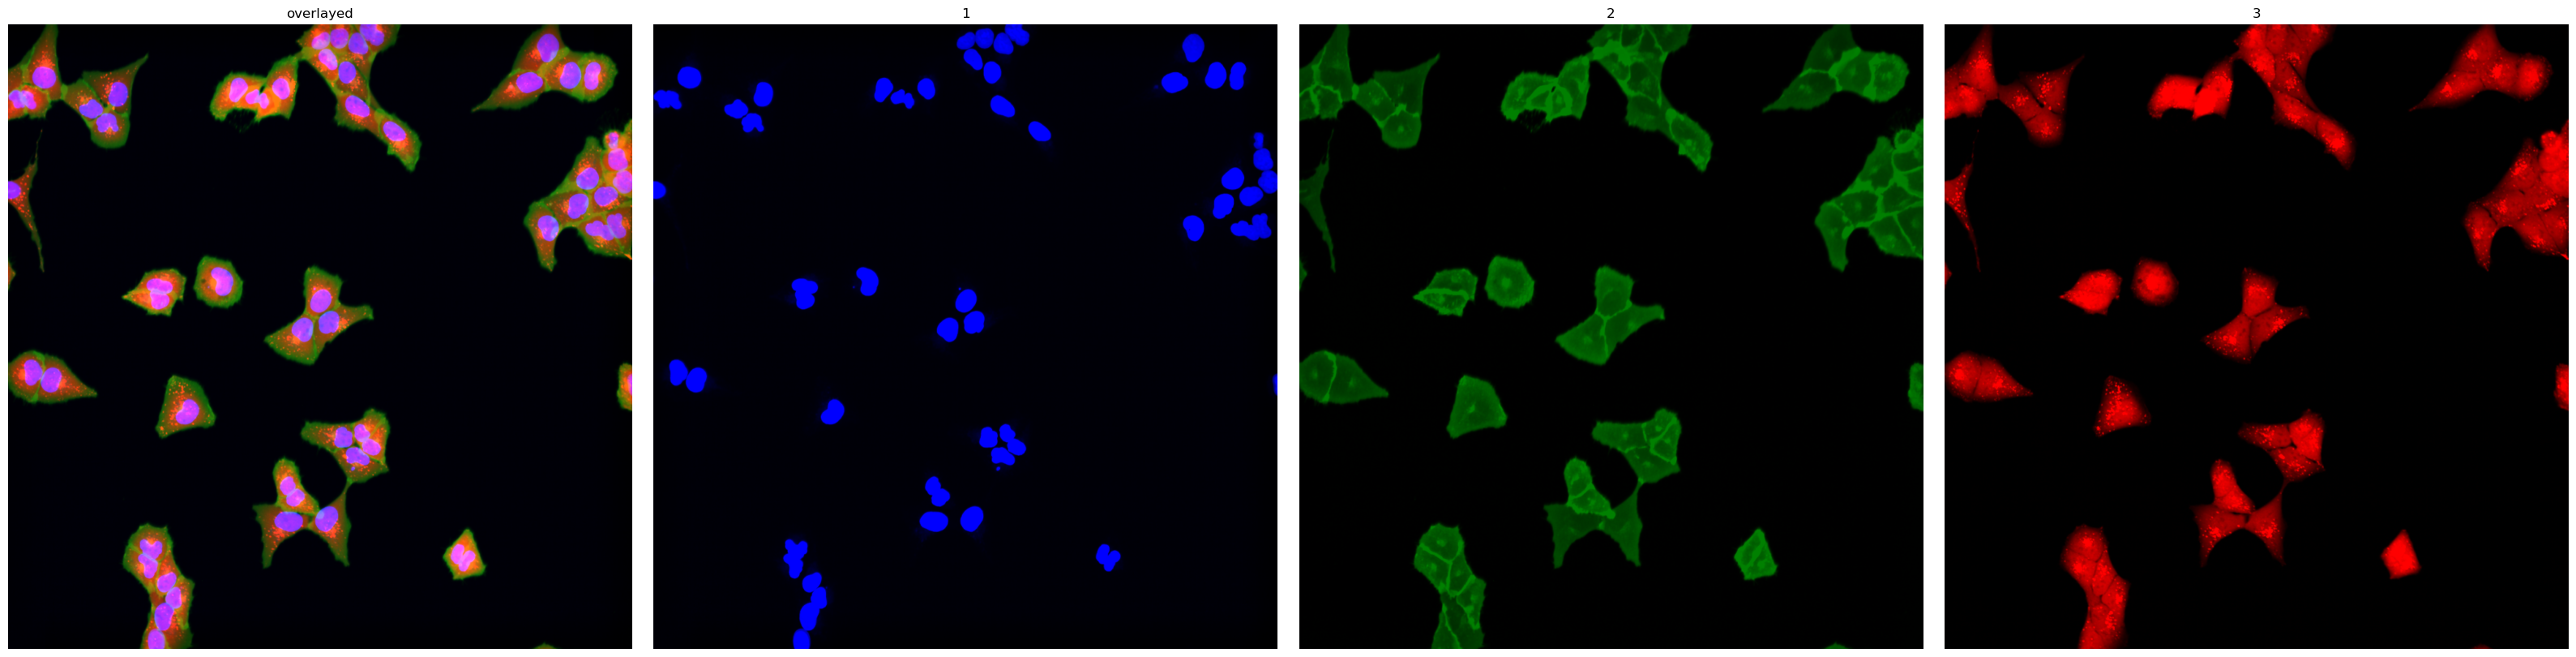

In [4]:
project.plot_input_image()

In [5]:
project.segment()

[18/03/2025 18:48:56] GPU Status for segmentation is True and will segment using the following device mps.
[18/03/2025 18:48:56] Segmentation will be performed wtih all 1 found GPUs.
[18/03/2025 18:48:56] GPU Status for segmentation is True with 1 GPUs found. Segmentation will be performed on the device mps with 1 processes per device in parallel.
[18/03/2025 18:48:56] Segmenting cytosol using the following model: cyto2


/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/cellpose/dynamics.py:189: RuntimeWarning: invalid value encountered in divide
  mu /= (1e-60 + (mu**2).sum(axis=0)**0.5)


[18/03/2025 18:49:08] Segmentation seg_all_cytosol written to sdata object.
[18/03/2025 18:49:10] Points centers_seg_all_cytosol written to sdata object.


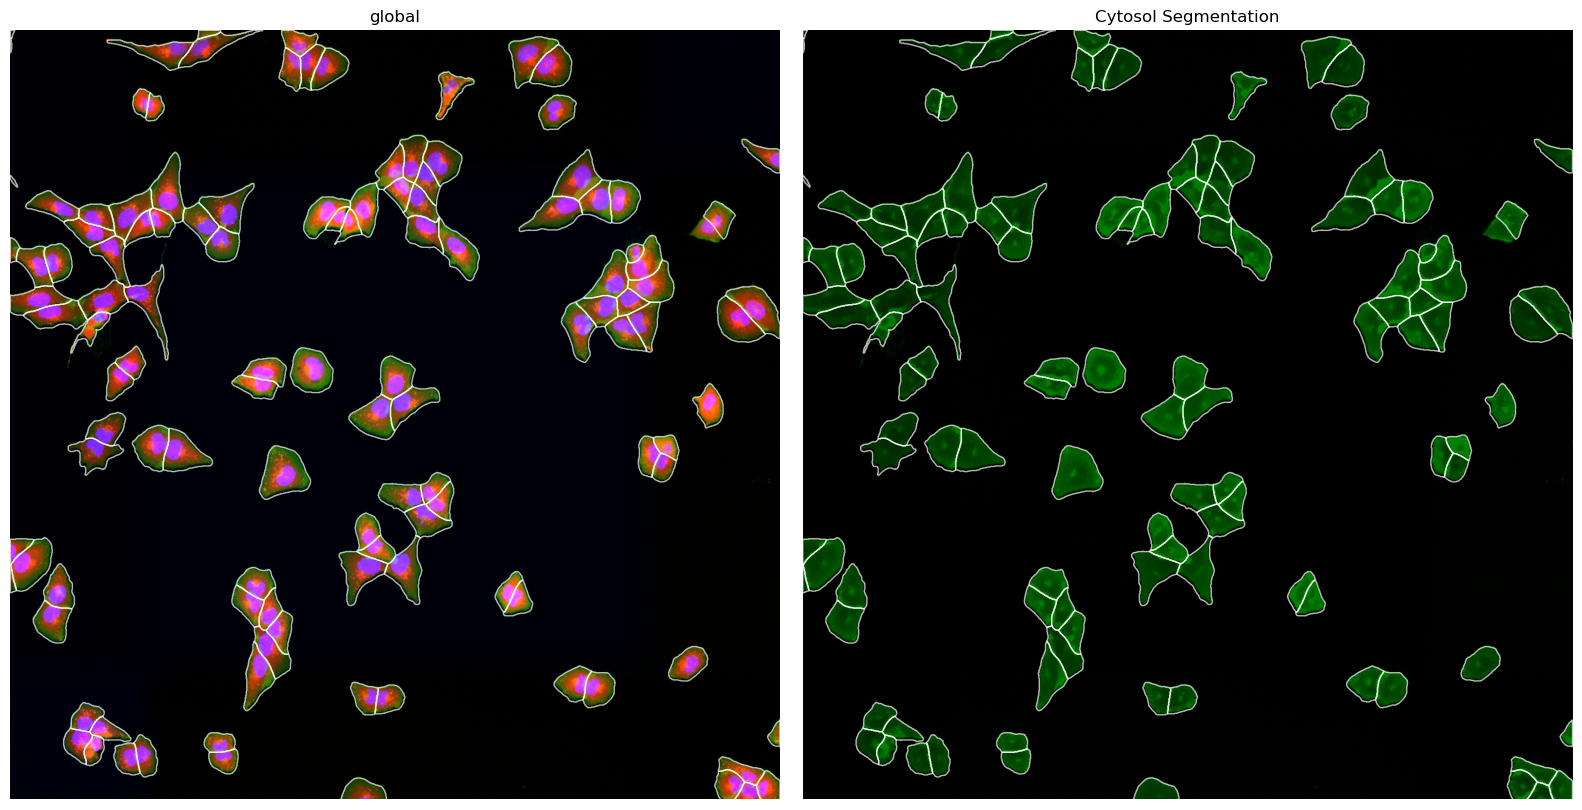

In [6]:
project.plot_segmentation_masks()

In [7]:
project.extract()

[18/03/2025 18:49:11] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_1_8qzd4i for HDF5CellExtraction
[18/03/2025 18:49:11] Created new directory for extraction results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/extraction/data
[18/03/2025 18:49:11] Setup output folder at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/extraction/data
[18/03/2025 18:49:11] Found 1 segmentation masks for the given key in the sdata object. Will be extracting single-cell images based on these masks: ['seg_all_cytosol']
[18/03/2025 18:49:11] Using seg_all_cytosol as the main segmentation mask to determine cell centers.
[18/03/2025 18:49:11] A total of 9 cells were too close to the image border to be extracted. Their cell_ids were saved to file /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/exam

/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/Users/sophia/mambaforge/envs/scPortrait_dev/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[18/03/2025 18:49:11] Finished transferring data to memory mapped arrays. Time taken: 0.22 seconds.
[18/03/2025 18:49:11] Using batch size of 100 for multiprocessing.
[18/03/2025 18:49:11] Running in multiprocessing mode with 5 threads.


Extracting cell batches:   0%|          | 0/5 [00:00<?, ?it/s]

[18/03/2025 18:49:12] Finished extraction in 0.50 seconds (893.41 cells / second)
[18/03/2025 18:49:12] Benchmarking times saved to file.
[18/03/2025 18:49:12] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./HDF5CellExtraction_1_8qzd4i'>


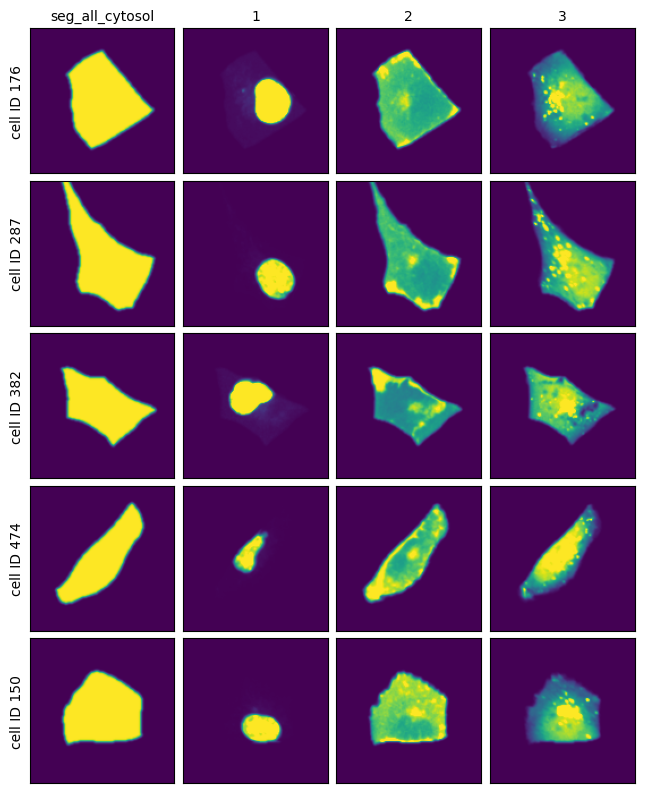

In [8]:
project.plot_single_cell_images()

In [9]:
project.featurize(overwrite=True)

Using extraction directory: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/extraction/data/single_cells.h5sc
[18/03/2025 18:49:13] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_amc2q3pf for CellFeaturizer
[18/03/2025 18:49:13] Started CellFeaturization of all available channels.
[18/03/2025 18:49:13] Overwrite flag is set, deleting existing directory for featurization results.
[18/03/2025 18:49:13] Created new directory for featurization results: /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/featurization/complete_CellFeaturizer
[18/03/2025 18:49:13] CPU specified in config file but MPS available on system. Consider changing the device for the next run.
[18/03/2025 18:49:13] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./CellFeaturizer_3u7gokkv for CellFeaturizer
[18/03/

In [10]:
# load classification results
results = pd.read_csv(f"{project_location}/featurization/complete_CellFeaturizer/calculated_image_features.csv")
results

,cytosol_area,1_mean_cytosol,1_median_cytosol,1_quant75_cytosol,1_quant25_cytosol,1_summed_intensity_cytosol,1_summed_intensity_area_normalized_cytosol,2_mean_cytosol,2_median_cytosol,2_quant75_cytosol,...,2_summed_intensity_cytosol,2_summed_intensity_area_normalized_cytosol,3_mean_cytosol,3_median_cytosol,3_quant75_cytosol,3_quant25_cytosol,3_summed_intensity_cytosol,3_summed_intensity_area_normalized_cytosol,label,cell_id
0,6927.0,0.074052,0.0,0.026459,0.0,1213.26010,0.175149,0.240117,0.0,6.782227e-01,...,3934.0850,0.567935,0.138888,0.0,1.565247e-01,0.0,2275.5398,0.328503,0,22
1,3981.0,0.055688,0.0,0.000000,0.0,912.39026,0.229186,0.111980,0.0,0.000000e+00,...,1834.6765,0.460858,0.103961,0.0,0.000000e+00,0.0,1703.2891,0.427855,0,25
2,5229.0,0.076646,0.0,0.019680,0.0,1255.77270,0.240155,0.204406,0.0,1.302185e-01,...,3348.9832,0.640463,0.154911,0.0,3.311920e-02,0.0,2538.0576,0.485381,0,26
3,3442.0,0.046033,0.0,0.000000,0.0,754.20950,0.219120,0.104971,0.0,0.000000e+00,...,1719.8502,0.499666,0.093452,0.0,0.000000e+00,0.0,1531.1213,0.444835,0,27
4,5463.0,0.057873,0.0,0.008547,0.0,948.19820,0.173567,0.182684,0.0,9.886169e-02,...,2993.1000,0.547886,0.133167,0.0,1.339340e-02,0.0,2181.8086,0.399379,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,4209.0,0.034690,0.0,0.000000,0.0,568.36804,0.135036,0.142048,0.0,2.533197e-07,...,2327.3137,0.552937,0.095533,0.0,5.960465e-08,0.0,1565.2133,0.371873,0,496
440,3285.0,0.059075,0.0,0.000000,0.0,967.88170,0.294637,0.102969,0.0,0.000000e+00,...,1687.0396,0.513558,0.082061,0.0,0.000000e+00,0.0,1344.4890,0.409281,0,497
441,5578.0,0.038588,0.0,0.001783,0.0,632.22570,0.113343,0.203797,0.0,2.258301e-01,...,3339.0146,0.598604,0.124447,0.0,1.148605e-02,0.0,2038.9376,0.365532,0,498
442,5595.0,0.052219,0.0,0.002640,0.0,855.55725,0.152915,0.178292,0.0,3.445435e-01,...,2921.1382,0.522098,0.134353,0.0,4.961395e-02,0.0,2201.2330,0.393429,0,499


In [11]:
#test selection workflow
selected_cells_large = results[results.cytosol_area > 4500]["cell_id"].tolist()
selected_cells_small = results[results.cytosol_area < 3000]["cell_id"].tolist()

cells_to_select = [
    {"name": "large_cells", "classes": selected_cells_large, "well": "A1"},
    {"name": "small_cells", "classes": selected_cells_small, "well": "B1"},
]

marker_0 = (0, 0)
marker_1 = (2000, 0)
marker_2 = (0, 2000)

calibration_marker = np.array([marker_0, marker_1, marker_2])


[18/03/2025 18:49:14] Initialized temporary directory at /var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_l11crrcc for LMDSelection
[18/03/2025 18:49:14] Selection process started.


Processing cell batches:   0%|          | 0/3 [00:00<?, ?it/s]

[18/03/2025 18:49:23] Temporary directory not found, skipping cleanup
[18/03/2025 18:49:23] Temporary directory not found, skipping cleanup
[18/03/2025 18:49:23] Temporary directory not found, skipping cleanup
[18/03/2025 18:49:23] Coordinate lookup index calculation took 8.95403050025925 seconds.
No configuration for shape_erosion found, parameter will be set to 0
No configuration for binary_smoothing found, parameter will be set to 3
No configuration for convolution_smoothing found, parameter will be set to 15
No configuration for rdp_epsilon found, parameter will be set to 0.1
No configuration for xml_decimal_transform found, parameter will be set to 100
No configuration for distance_heuristic found, parameter will be set to 300
No configuration for join_intersecting found, parameter will be set to True
Path optimizer used for XML generation: hilbert
cell set 0 passed sanity check
cell set 1 passed sanity check
Loading coordinates from external source
Processing cell sets in paralle

collecting cell sets:   0%|          | 0/2 [00:00<?, ?it/s]

Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.
Convert label format into coordinate format
Conversion finished, performing sanity check.
Intersecting Shapes will be merged into a single shape.


creating shapes:   0%|          | 0/34 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons:   0%|          | 0/34 [00:00<?, ?it/s]

0 shapes that were intersecting were found and merged.


calculating polygons: 100%|██████████| 34/34 [00:03<00:00,  9.92it/s]


Current path length: 34,667.38 units


creating shapes: 100%|██████████| 81/81 [00:02<00:00, 30.76it/s]


Optimized path length: 15,473.04 units
Optimization factor: 2.2x


calculating polygons:   0%|          | 0/81 [00:00<?, ?it/s]

Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


calculating polygons: 100%|██████████| 81/81 [00:07<00:00, 10.34it/s]


Current path length: 82,683.68 units
Optimized path length: 27,214.13 units
Optimization factor: 3.0x
Plotting shapes in debug mode is not supported in multi-threading mode.
Saving plots to disk instead.


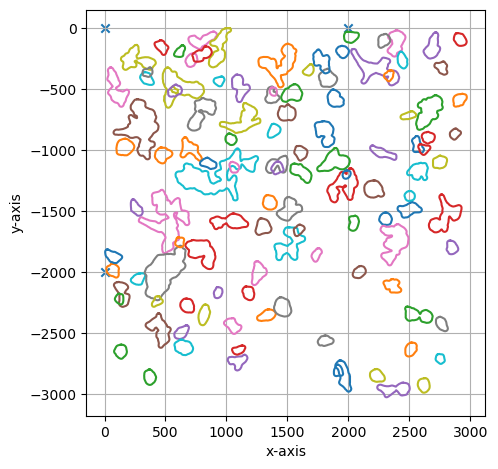

===== Collection Stats =====
Number of shapes: 115
Number of vertices: 16,789
Mean vertices: 146
Min vertices: 60
5% percentile vertices: 71
Median vertices: 103
95% percentile vertices: 332
Max vertices: 700
[0 0]
[      0 -200000]
[200000      0]
[18/03/2025 18:49:44] Saved output at /Users/sophia/Documents/GitHub/scPortrait/examples/notebooks/example_projects/example_1/project_cytosol_only/selection/large_cells_small_cells.xml
[18/03/2025 18:49:45] Cleaned up temporary directory at <TemporaryDirectory '/var/folders/35/p4c58_4n3bb0bxnzgns1t7kh0000gn/T/./LMDSelection_l11crrcc'>


In [12]:
project.selection_f.segmentation_channel_to_select = "seg_all_cytosol" #update to the correct channel for this notebook with out loading a different config
project.select(cells_to_select, calibration_marker)